In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
feature = pd.read_csv("Raisin_Dataset.csv", index_col = 0)
features = feature
features

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,,,,,,,
87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...
83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni


In [3]:
features['Class']

Area
87524    Kecimen
75166    Kecimen
90856    Kecimen
45928    Kecimen
79408    Kecimen
          ...   
83248      Besni
87350      Besni
99657      Besni
93523      Besni
85609      Besni
Name: Class, Length: 900, dtype: object

In [4]:
features.columns

Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [5]:
features.keys()

Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [6]:
features.isna().sum()

MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [7]:
#print(features)

data = features
data['Class'] = data['Class'].replace({'Kecimen': 0, 'Besni': 1})


In [8]:
y=data['Class'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
X=data.drop('Class',axis=1)


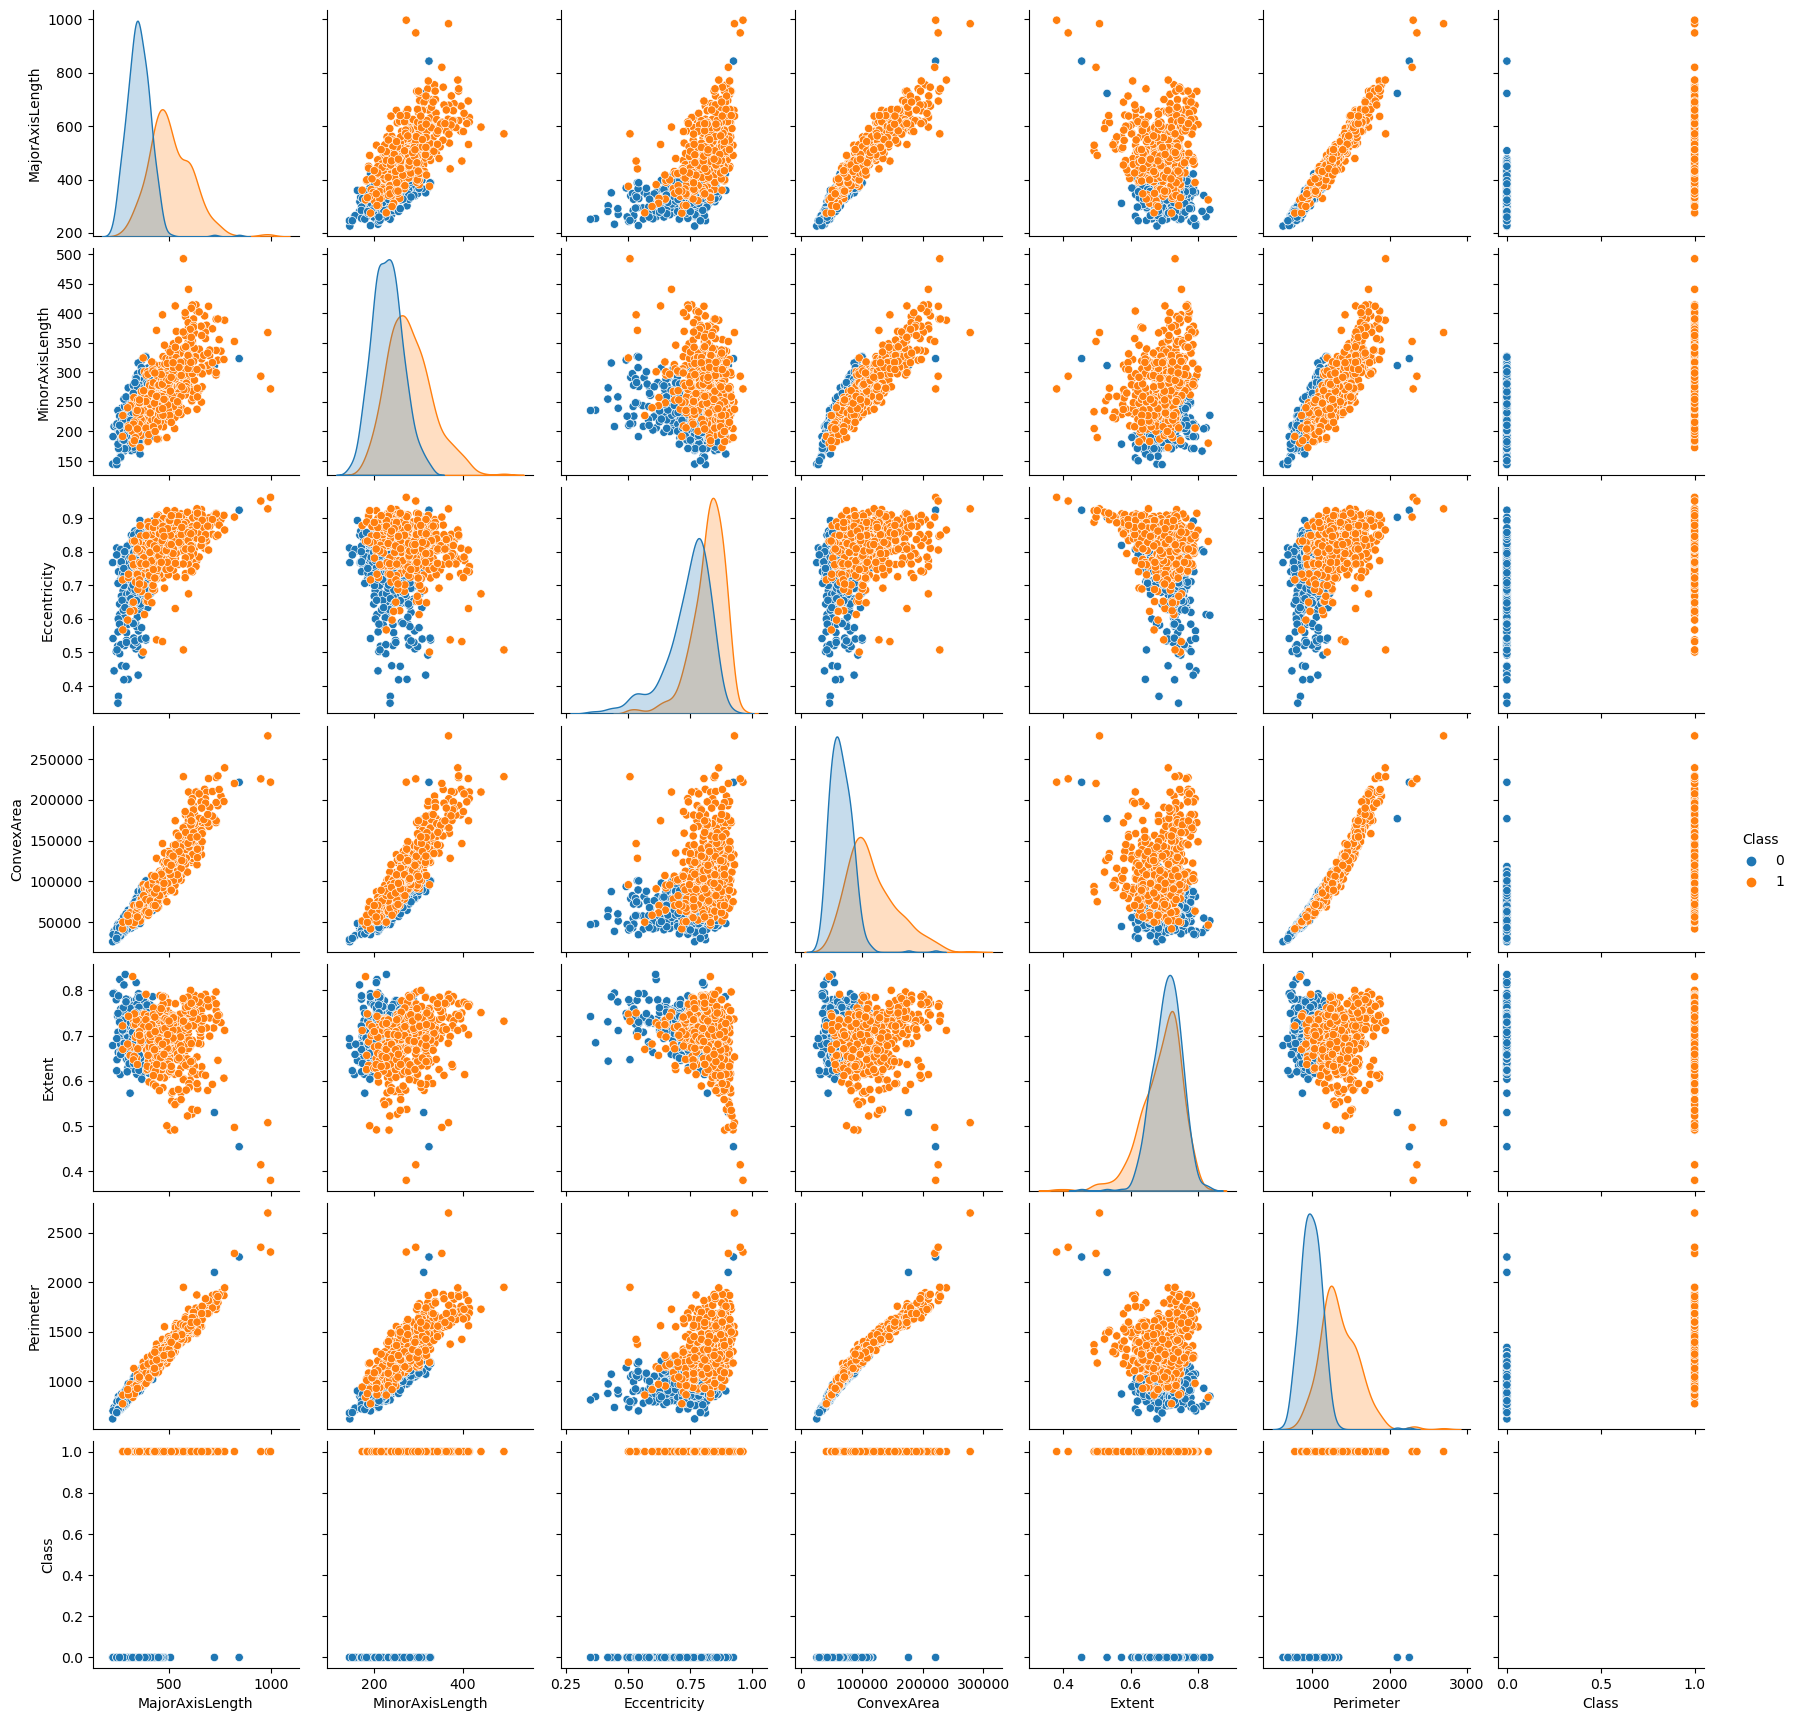

In [10]:
import seaborn as sns

sns.pairplot(data,
             vars=['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'Extent', 'Perimeter', 'Class'],
            hue ='Class')
plt.show()

In [11]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values


#Y = pd.get_dummies(y).values
Y=y

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test  = ss.transform(X_test)

In [12]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [13]:
X_train

array([[-0.78812672, -0.38730055, -0.6465287 , -0.65224802,  0.23753637,
        -0.71404437],
       [-1.35563187, -0.54502864, -2.38413446, -1.00956114, -0.58197907,
        -1.13149817],
       [-0.98454723, -0.86018782, -0.37713361, -0.92403154,  0.19911415,
        -0.99769926],
       ...,
       [ 0.10379878, -0.20874035,  0.58570282, -0.04391002, -0.26892835,
         0.28777656],
       [ 0.82730363,  1.88169876, -0.39350244,  1.33404467, -0.11791121,
         1.16198015],
       [ 0.21301716,  0.00791686,  0.51941113,  0.05788717,  0.70180368,
         0.18085058]])

In [14]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [15]:
X_test

array([[ 0.25404955,  0.58980998,  0.04538426,  0.33982546, -0.50100234,
         0.40355155],
       [-0.7118242 , -1.12532793,  0.4733794 , -0.8602087 ,  0.61015172,
        -0.83411273],
       [ 0.21247322,  0.85775103, -0.28798439,  0.44025038,  0.51278193,
         0.35033394],
       ...,
       [ 1.5065259 ,  1.45823802,  0.63922292,  1.55737473, -0.18499717,
         1.48453765],
       [-0.33196457, -0.17067523, -0.02405496, -0.32579841, -0.263055  ,
        -0.36704161],
       [-0.48480495, -0.41656055,  0.01062507, -0.48562997,  0.71929679,
        -0.51084341]])

In [16]:
X_test

array([[ 0.25404955,  0.58980998,  0.04538426,  0.33982546, -0.50100234,
         0.40355155],
       [-0.7118242 , -1.12532793,  0.4733794 , -0.8602087 ,  0.61015172,
        -0.83411273],
       [ 0.21247322,  0.85775103, -0.28798439,  0.44025038,  0.51278193,
         0.35033394],
       ...,
       [ 1.5065259 ,  1.45823802,  0.63922292,  1.55737473, -0.18499717,
         1.48453765],
       [-0.33196457, -0.17067523, -0.02405496, -0.32579841, -0.263055  ,
        -0.36704161],
       [-0.48480495, -0.41656055,  0.01062507, -0.48562997,  0.71929679,
        -0.51084341]])

In [17]:
y_test

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0])

In [48]:

from keras.models import Sequential
from keras.layers import Dense
from tensorflow._api.v2.config import optimizer
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten

model = Sequential()

model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(6,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())


model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))

model.add(Dense(2,activation='relu'))

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer = 'adam')


model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 5, 16)             48        
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 2, 16)             0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 64)                2112      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)                528       
                                                     

In [49]:
#fitting the model and predicting
from sklearn.utils import validation
# fit network
early_stopping_checkpoint = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True, mode = "auto")

model_history=model.fit(callbacks = [early_stopping_checkpoint],x=X_train, y=y_train, epochs=1000,validation_data= (X_test,y_test))


Epoch 1/1000
23/23 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.7708 - val_loss: 0.6265 - val_accuracy: 0.8722
Epoch 2/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.8542 - val_loss: 0.4119 - val_accuracy: 0.8944
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8639 - val_loss: 0.3823 - val_accuracy: 0.8944
Epoch 4/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8611 - val_loss: 0.3735 - val_accuracy: 0.8889
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8694 - val_loss: 0.3655 - val_accuracy: 0.8889
Epoch 6/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8708 - val_loss: 0.4435 - val_accuracy: 0.8889
Epoch 7/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8681 - val_loss: 0.4190 - val_accuracy: 0.8778
Epoch 

In [20]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

6/6 [==============================] - 0s 438us/step


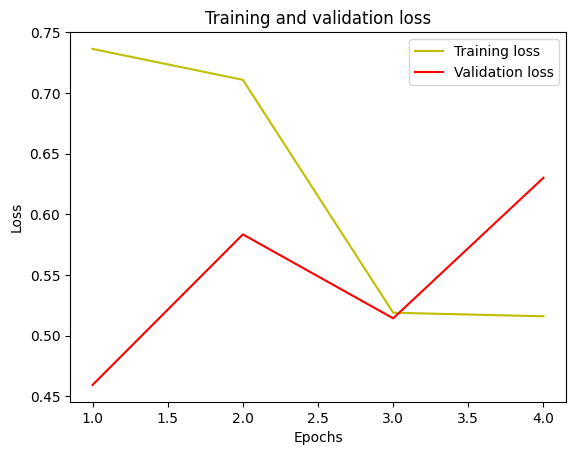

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

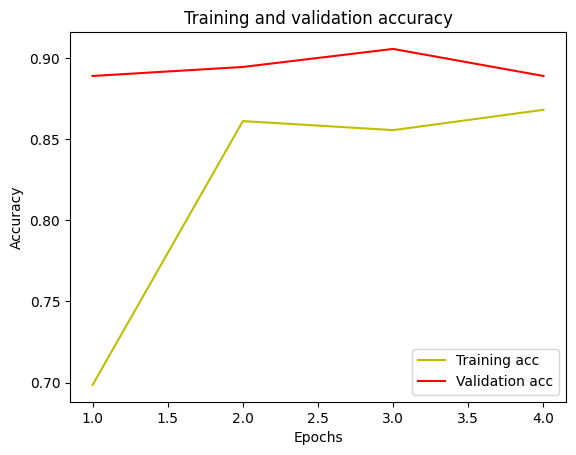

In [147]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()